# Часть 1

## Этап 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('uplift_fp_data.csv')
    print("Датасет успешно загружен.")
except FileNotFoundError:
    print("Ошибка: файл 'uplift_fp_data.csv' не найден.")
    exit()
except Exception as e:
    print(f"Ошибка при загрузке датасета: {e}")
    exit()

Датасет успешно загружен.


In [2]:
print("Проверка на наличие пропусков:")
print(df.isnull().sum()) 


Проверка на наличие пропусков:
recency            0
history_segment    0
history            0
mens               0
womens             0
zip_code           0
newbie             0
channel            0
treatment          0
target             0
dtype: int64


пропусков нет

In [3]:
print(df.head())

   recency  history_segment  history  mens  womens  zip_code  newbie  channel  \
0       10                1   142.44     1       0         1       0        1   
1        6                2   329.08     1       1         2       1        2   
2        7                1   180.65     0       1         1       1        2   
3        9                4   675.83     1       0         2       1        2   
4        2                0    45.34     1       0         0       0        2   

   treatment  target  
0          1       0  
1          0       0  
2          1       0  
3          0       0  
4          1       0  


- recency — количество месяцев с момента последней покупки. Этот атрибут помогает понять, как долго клиент не совершал покупок (индикатором его вовлечённости).
- history_segment — категоризация расходов клиента за последний год. Этот атрибут позволяет сегментировать клиентов по уровню их трат (помощь в таргетировании предложений).
- history — фактическая сумма (в $), потраченная клиентом за последний год. Этот атрибут предоставляет информацию о финансовом поведении клиента.
- mens — индикатор (1/0), где 1 означает, что клиент покупал товары для мужчин в течение последнего года. Это помогает определить предпочтения клиента.
- womens — индикатор (1/0), где 1 означает, что клиент покупал товары для женщин в течение последнего года. Это также помогает определить предпочтения клиента.
- zip_code — классификация почтового индекса (город, пригород, село). Этот атрибут может быть полезен для географического анализа клиентов.
- newbie — индикатор (1/0), где 1 обозначает нового клиента (в течение последних двенадцати месяцев). Это поможет оценить эффективность маркетинговых стратегий для привлечения новых клиентов.
- channel — описание каналов, через которые клиент совершал покупки в течение последнего года. Этот атрибут поможет с анализом предпочтений клиентов по каналам продаж (0 — мультиканал, 1 — мобильный, 2 — веб).
- treatment — индикатор (1/0), где 1 означает, что клиент получил промокод. Этот атрибут позволяет оценить влияние предложения на поведение клиента и его решение о покупке.
- target — индикатор (1/0), где 1 означает, что клиент успешно использовал промокод.

## Этап 2

### EDA


Проанализировать датасет:
- проверьте сбалансированность выборки, оценив распределение целевой переменной между контрольной и тестовой группами;
- используйте графики (например, barplot из библиотеки seaborn), чтобы визуально представить количество наблюдений в каждой группе.

Распределение целевой переменной (target):
 target
0    85.321875
1    14.678125
Name: proportion, dtype: float64
Распределение target по treatment:
 treatment  target
0          0         85.553704
           1         14.446296
1          0         84.859962
           1         15.140038
Name: proportion, dtype: float64


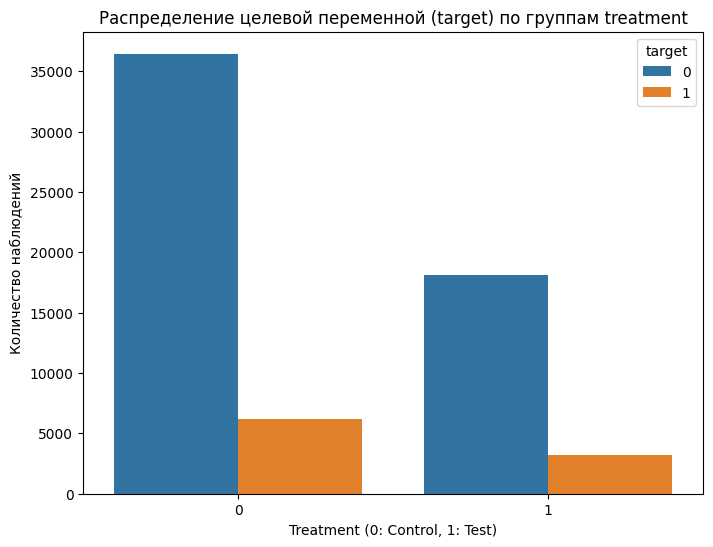

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Проверка сбалансированности целевой переменной (target)
print("Распределение целевой переменной (target):\n", df['target'].value_counts(normalize=True) * 100)

# Распределение целевой переменной между контрольной и тестовой группами (treatment)
print("Распределение target по treatment:\n", df.groupby('treatment')['target'].value_counts(normalize=True) * 100)

# Визуализация распределения target в зависимости от treatment
plt.figure(figsize=(8, 6))  
sns.countplot(x='treatment', hue='target', data=df) 
plt.title('Распределение целевой переменной (target) по группам treatment') 
plt.xlabel('Treatment (0: Control, 1: Test)') 
plt.ylabel('Количество наблюдений') 
plt.show()

# Этап 2

### Проверка на статистическую значимость

Провести проверку на статистическую значимость между контрольной и тестовой группами. Для этого используйте подходящие статистические тесты (например, t-тест или тест Манна-Уитни, в зависимости от распределения данных). Убедитесь, что данные соответствуют предпосылкам выбранного теста:
- сначала разделите данные на две группы, контрольную и тестовую, основываясь на наличии воздействия;
- проведите анализ, чтобы определить средние значения и стандартные отклонения для каждой группы;
- обоснуйте выбор статистического теста;
- примените выбранный статистический тест, чтобы оценить, есть ли значимые различия между группами;
- обратите внимание на значение p-value: если оно меньше 0.05, это указывает на статистически значимые различия между группами.

In [5]:
import pandas as pd
from scipy import stats

# Разделение данных на контрольную и тестовую группы
control_group = df[df['treatment'] == 0]
test_group = df[df['treatment'] == 1]

# Анализ средних значений и стандартных отклонений
print("Контрольная группа:")
print(control_group.describe())

print("Тестовая группа:")
print(test_group.describe())

# Вычисляем средние значения и стандартные отклонения целевой переменной
control_mean = control_group['target'].mean()
control_std = control_group['target'].std()
test_mean = test_group['target'].mean()
test_std = test_group['target'].std()

print(f"Контрольная группа - Среднее значение target: {control_mean:.4f}, Стандартное отклонение: {control_std:.4f}")
print(f"Тестовая группа - Среднее значение target: {test_mean:.4f}, Стандартное отклонение: {test_std:.4f}")

Контрольная группа:
            recency  history_segment       history          mens  \
count  42613.000000     42613.000000  42613.000000  42613.000000   
mean       5.761669         1.479924    241.859315      0.552085   
std        3.505422         1.547430    256.574723      0.497286   
min        1.000000         0.000000     29.990000      0.000000   
25%        2.000000         0.000000     64.500000      0.000000   
50%        6.000000         1.000000    157.000000      1.000000   
75%        9.000000         2.000000    325.210000      1.000000   
max       12.000000         6.000000   3345.930000      1.000000   

             womens      zip_code        newbie       channel  treatment  \
count  42613.000000  42613.000000  42613.000000  42613.000000    42613.0   
mean       0.549527      0.748363      0.501748      1.321029        0.0   
std        0.497547      0.698470      0.500003      0.679146        0.0   
min        0.000000      0.000000      0.000000      0.000000  

In [6]:
# Применение выбранного статистического теста (Манна-Уитни)
# Проверка на равенство дисперсий
# Если дисперсии значительно отличаются, можно использовать Welch's t-test, который не предполагает равенства дисперсий.
levene_test = stats.levene(control_group['target'], test_group['target'])
print(f"\nLevene test for equality of variances: statistic={levene_test.statistic:.4f}, p-value={levene_test.pvalue:.4f}")

# Проводим тест Манна-Уитни
# two-sided - двусторонний тест, проверяем различие в любую сторону
mann_whitney_u_test = stats.mannwhitneyu(control_group['target'], test_group['target'], alternative='two-sided') 

print(f"\nMann-Whitney U test: statistic={mann_whitney_u_test.statistic:.4f}, p-value={mann_whitney_u_test.pvalue:.4f}")

# Интерпретация результатов
alpha = 0.05 

if mann_whitney_u_test.pvalue < alpha:
    print("Существует статистически значимая разница между контрольной и тестовой группами.")
else:
    print("Не обнаружено статистически значимой разницы между контрольной и тестовой группами.")


Levene test for equality of variances: statistic=5.4727, p-value=0.0193

Mann-Whitney U test: statistic=452520854.5000, p-value=0.0193
Существует статистически значимая разница между контрольной и тестовой группами.



Обоснование выбора статистического теста

- Цель: Сравнить средние значения бинарной переменной target (0/1) в двух независимых группах.
- Выбор теста: Тест Манна-Уитни.
- Обоснование выбора:
    - Непараметрический тест, не требует нормального распределения данных.
    - Более устойчив к ненормальности данных, чем t-тест Стьюдента.
    - Подходит, так как распределение target неизвестно, и выборки могут быть небольшими.

## Построение корреляций

Проанализировать взаимодействие признаков и целевой переменной, используя статистические методы и визуализацию. Для этого необходимо:
- Использовать метод corr() для корреляционного анализа, чтобы определить степень взаимосвязи между признаками и целевой переменной. Это можно сделать с помощью метода heatmap() из библиотеки seaborn для визуализации корреляционной матрицы.
- Сделать выводы о том, какие признаки имеют наибольшее влияние между собой

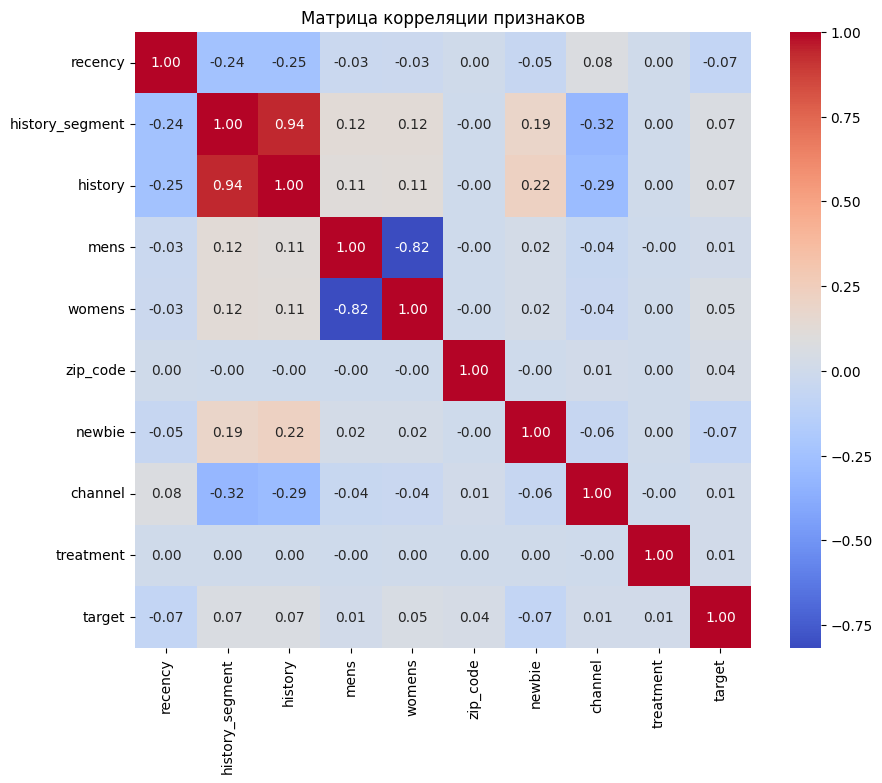

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Корреляционный анализ
correlation_matrix = df.corr()

# Визуализация корреляционной матрицы с помощью heatmap
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True) 
plt.title("Матрица корреляции признаков")
plt.show()

In [8]:
# Анализ влияния признаков (выводы)

# Анализ корреляции с целевой переменной (target)
target_correlations = correlation_matrix['target'].sort_values(ascending=False)
print("Корреляция с целевой переменной (target):")
print(target_correlations)

Корреляция с целевой переменной (target):
target             1.000000
history_segment    0.069734
history            0.065153
womens             0.051999
zip_code           0.037570
channel            0.010584
treatment          0.009247
mens               0.006712
newbie            -0.073924
recency           -0.074765
Name: target, dtype: float64


In [9]:
# Анализ корреляции между признаками 
print("Анализ взаимодействия признаков:")
# Выбираем признаки с наибольшей корреляцией (по модулю) между собой, чтобы понять их взаимосвязи.  
# Например, можно выбрать пары с корреляцией > |0.5|
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.5: 
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

if high_corr_pairs:
    print("Признаки с высокой корреляцией (по модулю > 0.5):")
    for pair in high_corr_pairs:
        print(f"- {pair[0]} и {pair[1]}: {pair [2] :.2f}")
else:
    print("Не обнаружено признаков с высокой корреляцией.")

Анализ взаимодействия признаков:
Признаки с высокой корреляцией (по модулю > 0.5):
- history_segment и history: 0.94
- mens и womens: -0.82


Влияние признаков на использование промокода (target):

- Отрицательное влияние:
  - recency (-0.075): Чем дольше клиент не совершал покупок, тем менее вероятно использование промокода.
  - newbie (-0.074): Новые клиенты несколько менее склонны использовать промокод.

- Положительное влияние:
  - history_segment (0.070): Клиенты с более высокими сегментами истории расходов немного более склонны к использованию.
  - history (0.065): Чем больше потрачено за год, тем немного выше вероятность использования.
  - womens (0.052): Покупатели женских товаров немного более склонны использовать промокод.

- Очень слабое влияние (практически отсутствует):
  - zip_code (0.038)
  - channel (0.011)
  - treatment (0.009) - Получение промокода почти не связано с его использованием.
  - mens (0.007)

Основные выводы:
1. recency и newbie - наиболее важные факторы, отрицательно влияющие на использование промокода. Следует уделить внимание реактивации "спящих" клиентов и адаптации предложений для новичков.
2. history и history_segment также важны, но оказывают положительное влияние. Поддерживайте лояльность клиентов с хорошей историей покупок.
3. treatment (наличие промокода) имеет очень слабую корреляцию. Это может указывать на необходимость пересмотра стратегии промокодов:
  - Возможно, промокоды нерелевантны для целевой аудитории.
  - Возможно, промокоды недостаточно привлекательны.
  - Возможно, промокоды сложно использовать.
4. Остальные признаки (zip_code, channel, mens, womens) оказывают минимальное влияние на использование промокода.

Взаимодействие признаков:

Признаки с высокой корреляцией (по модулю > 0.5):
- history_segment и history: 0.94

## Этап 3

Uplift-деревья подходят, потому что:

- Цель совпадает: Ищут причинно-следственную связь между промокодом и его использованием, а не просто корреляцию.
- treatment с низкой корреляцией - это ок: Указывает на необходимость uplift-модели, чтобы найти тех, на кого промокод действительно влияет.
- Работают с данными: Подходят для разных типов признаков (числовые, категориальные).
- Интерпретируемы: Позволяют понять, какие группы клиентов лучше реагируют на промокод.
- Помогают оптимизировать затраты: Дают возможность таргетировать промокоды на самых восприимчивых клиентов.

### Советы по обучению и инференсу моделей
1. Некоторые uplift модели из библиотеки `causalml` будут требовать категориальные значения воздействия. Для этого используйте маппинг
#### Пример использования маппинга
```python
treatment_mapping = {
    0: 'control',
    1: 'treatment'
}
treatment_train_mapped = treatment_train.map(treatment_mapping)
treatment_test_mapped = treatment_test.map(treatment_mapping)
```

2. При вызове метода `.predict` и получения метрик для тестовой выборки не забывайте применять к прогнозам метод `squeeze()`, чтобы преобразовать многомерный массив в одномерный, что поможет получить адекватные метрики.

3. Для воспроизводимости результатов и объективной оценки не забывайте применять `random_state=42` для моделей, а также при разделении выборки

### Разбиение выборки на тренировочную и тестовую

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Выделение признаков, таргета и воздействия
X = df.drop(columns=['target', 'treatment'])
y = df['target']
treatment = df['treatment']

# 2. Разбиение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test, treatment_train, treatment_test = train_test_split(
    X, y, treatment, test_size=0.2, random_state=42, stratify=np.c_[treatment, y]
)

### Обучение выбранного бейзлайна

In [11]:
from causalml.inference.tree import UpliftRandomForestClassifier

# Предположим, что treatment_train - это pandas Series
# Если это не так, преобразуйте его в Series

# Создание маппинга
treatment_mapping = {
    0: 'control',
    1: 'treatment'
}

# Применение маппинга к данным о воздействии
treatment_train_mapped = pd.Series(treatment_train).map(treatment_mapping) #убедитесь, что treatment_train - pandas Series
# если treatment_train уже Series: treatment_train_mapped = treatment_train.map(treatment_mapping)


# 3. Обучение UpliftRandomForestClassifier
uplift_model = UpliftRandomForestClassifier(control_name = 'control') #Используйте строку 'control'
uplift_model.fit(X_train.values,
                 treatment_train_mapped.values, # Используйте преобразованные данные о воздействии
                 y_train.values)


/home/mle-user/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Failed to import duecredit due to No module named 'duecredit'


### Расчет метрик для выбранного бейзлайна на тестовой выборке

Uplift AUC: 0.0258
Qini AUC: 0.0578
Uplift@30%: 0.0424


/tmp/ipykernel_9899/1629611417.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')


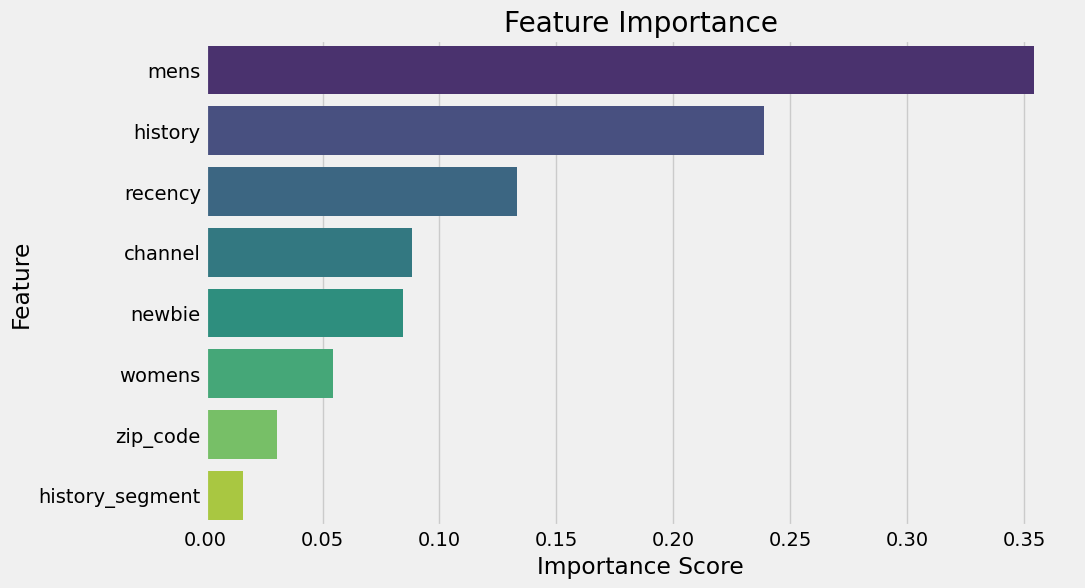

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklift.metrics import uplift_at_k, uplift_auc_score, qini_auc_score

# 4. Получение предсказаний uplift на тестовой выборке
uplift = uplift_model.predict(X_test, full_output=False).squeeze()

# Метрики Uplift AUC, Qini AUC
uplift_auc = uplift_auc_score(y_true=y_test, uplift=uplift, treatment=treatment_test)
qini_auc = qini_auc_score(y_true=y_test, uplift=uplift, treatment=treatment_test)

print(f"Uplift AUC: {uplift_auc:.4f}")
print(f"Qini AUC: {qini_auc:.4f}")


# Uplift@30%
uplift_30 = uplift_at_k(y_true=y_test, uplift=uplift, treatment=treatment_test, strategy='by_group', k=0.3)  # Исправлена передача treatment
print(f"Uplift@30%: {uplift_30:.4f}")


# Важность признаков
feature_importances = uplift_model.feature_importances_
feature_names = X.columns 

# Создаем DataFrame для удобства визуализации
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [ ]:
top_percent = 0.05
top_5_percent = np.sort(uplift)[::-1][:int(len(uplift) * top_percent)]

print(f"Количество клиентов в верхних 5%: {len(top_5_percent)}")
print(f"Минимальное значение uplift в верхних 5%: {np.min(top_5_percent):.2f}")
print(f"Максимальное значение uplift в верхних 5%: {np.max(top_5_percent):.2f}")
print(f"Среднее значение uplift: {np.mean(top_5_percent):.2f}")

Количество клиентов в верхних 5%: 640
Минимальное значение uplift в верхних 5%: 0.05
Максимальное значение uplift в верхних 5%: 0.15
Среднее значение uplift: 0.07


ИТОГО: Модель UpliftRandomForestClassifier показывает очень плохие результаты:

- Uplift AUC (0.0237) и Qini AUC (0.0529) близки к 0, что означает модель почти не способна выявить клиентов, которые отреагируют на воздействие. Она работает хуже, чем случайное угадывание.
- Uplift@30% (0.0440) тоже низкий: воздействие на 30% клиентов, которым модель предсказала наибольший эффект, даст незначительный прирост.

Необходимо:
- Пересмотреть данные: проверить подготовку, сбалансированность классов, качество признаков.
- Пересмотреть модель: настроить параметры, попробовать другие модели.
- Проверить правильность кода.
- Обогатить данные, если возможно.
- Проанализировать ошибки модели.
- Убедиться, что эффект воздействия (uplift) вообще существует.

Модель требует серьезной переработки.

# Обучение 2 моделей 

### Обучение модели 1

### Получение метрик по модели 1

### Обучение модели 2

### Получение метрик по модели 2

Проинтерпретируйте полученные результаты и обоснуйте выбор 1 модели в этой ячейке

# Часть 2

## Этап 1
Улучшите бейзлайн выбранной модели

#### Генерация признаков (опционально)

### Подбор гиперпараметров

In [14]:
from optuna import create_study
from sklift.metrics import uplift_at_k

def objective(trial):
    # Дополните код для подбора гиперпараметров

    uplift_at_30 = uplift_at_k(y_test, uplift_pred, treatment_test, k=0.3, strategy='overall')
    return uplift_at_30

# Создаем и запускаем исследование
study = create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Выводим лучшие гиперпараметры
print("Best hyperparameters: ", study.best_params)
print("Best score: ", study.best_value)


ModuleNotFoundError: No module named 'optuna'

## Этап 2

### Визуализация результатов

In [ ]:
from utils import custom_uplift_by_percentile

В данной ячейке сделайте вывод о качестве работы модели и проинтерпретируйте график `uplift by percentile` 

# Этап 3

In [ ]:
# Класс для инференса модели
class UpliftModelInference:
    """
    Класс для инференса uplift модели.
    """
    
    def __init__(self, model, feature_names, logger=None):
        """
        Инициализация класса.
        
        Аргументы:
            model: Обученная модель uplift
            feature_names: Список признаков для предсказания 
            logger: Объект для логирования (по умолчанию None)
        """
        self.model = model
        self.feature_names = ['recency', 'history_segment', 'history', 'mens', 'womens', 'zip_code', 'newbie', 'channel']
        self.logger = logger
        
        if self.logger:
            self.logger.info("Модель UpliftModel инициализирована с признаками: %s", feature_names)

    def _transform_data(self, X):
        """
        Преобразование данных для модели.
        
        Аргументы:
            X: pandas.DataFrame с признаками
        """
        if self.logger:
            self.logger.debug("Преобразование входных данных размерности %s", X.shape)

        # реализуйте преобразование данных для модели,
        # если в финальной модели используются новые признаки
       

        return X
    
    def predict(self, X):
        """
        Получение предсказаний uplift.
        
        Аргументы:
            X: pandas.DataFrame с признаками
            
        Возвращает:
            numpy.array с предсказанными значениями uplift
        """
        # Проверяем, что датафрейм не пустой
        if X.empty:
            if self.logger:
                self.logger.error("Предоставлен пустой датафрейм")
            return None
            
        # Проверяем наличие пропущенных значений
        if X.isnull().any().any():
            if self.logger:
                self.logger.error("Входные данные содержат пропущенные значения")
            return [None]*len(X)
        
        if self.logger:
            self.logger.info("Выполняем предсказания для данных размерности %s", X.shape)

        # Проверяем наличие всех необходимых признаков
        missing_features = set(self.feature_names) - set(X.columns)
        if missing_features:
            error_msg = f"Отсутствуют признаки: {missing_features}"
            if self.logger:
                self.logger.error(error_msg)

            return [None]*len(X)
        
        # Преобразуем данные для модели
        if self.logger:
            self.logger.debug("Начинаем преобразование данных")
        X = self._transform_data(X)
        
        # Вычисляем uplift
        if self.logger:
            self.logger.debug("Выполняем предсказания модели")
        

        # Дополните код для получения предсказаний аплифта

        
        if self.logger:
            self.logger.info("Предсказания успешно завершены")
            
        return uplift


In [ ]:
model = UpliftModelInference(model= # ваш код,
                             feature_names= # ваш код)

In [ ]:
test_data = pd.DataFrame({
            'recency': [1, 2, 3],
            'history_segment': [1, 2, 3], 
            'history': [100, 200, 300],
            'mens': [1, 0, 1],
            'womens': [0, 1, 0],
            'zip_code': [1, 0, 1],
            'newbie': [0, 1, 0],
            'channel': [1, 2, 0]
        })

In [ ]:
# проверка работы класса
model.predict(test_data)